In [1]:
import pickle
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Import the table

In [2]:
with open('node_data.pkl','rb') as f:
    data = pickle.load(f)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,Label,Restaurant
0,1.415893,0.259745,-0.048055,-1.346963,-0.013914,-1.586083,-1.239873,-0.309444,1.464082,0.644394,...,-2.967759,-0.693519,0.420585,0.429933,-0.522547,-1.770239,0.874375,-1.065355,local,enjoy-eating-house-and-bar
1,0.858691,0.202171,-1.422381,-2.101661,-0.350286,-0.295589,-0.966746,0.022582,0.143381,-0.909143,...,-1.384936,-1.319240,-0.158383,-0.232669,0.387525,0.901896,0.030904,0.080464,western-local,elemen
2,-0.291935,0.188327,-0.001007,-1.528010,-0.540276,0.365864,-2.001289,-1.037824,0.014204,0.598610,...,-0.178027,0.321222,0.940976,-0.976259,0.746156,-0.137180,0.454292,0.599178,western-local,breko-cafe-holland-village
3,1.773133,0.929864,-0.446564,-0.201175,0.957477,-0.625841,-0.425833,0.391868,0.238521,-0.342247,...,0.028649,0.387085,0.201941,0.504061,-0.129276,-0.914655,0.610758,-1.035000,local,thesaltedplumsg
4,1.063667,-1.232356,1.224856,-1.938827,0.242856,0.339426,1.588809,0.256258,-1.552113,0.291350,...,0.017367,-2.201938,0.943608,0.628776,1.730433,-1.259296,0.897154,-1.836153,western-local,four-seasons-durians-restaurant


In [4]:
# convert label to numbers
# 1 = western
# 2 = local food
# 3 = western-local/western-japanese/japanese-local/middle-eastern
# 4 = dessert
# 5 = japanese

data['Cuisine'] = data['Label']

data['Label'].replace(to_replace=['western','local','western-local','dessert',
                                    'japanese','western-japanese', 'japanese-local','thai','middle-eastern'],
                      value=[1,2,3,4,5,3,3,2,2], inplace=True)

In [5]:
# Select non-fusion food
data = data[data['Label'] != 3]

X = data.drop('Label', axis=1) # For training / testing
Y = data['Label'] # Label for training / testing

X_pca = X.drop(['Restaurant','Cuisine'], axis=1) # For PCA visual
Y_pca = Y.replace(to_replace=[1,2,3,4,5], value=['red','blue','black','green','orange']) # Label for PCA vis

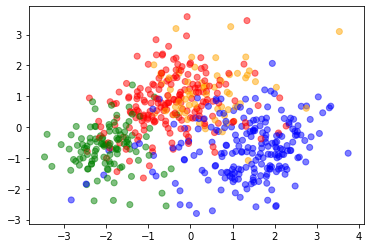

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca)
plt.scatter(X_pca[:,0], X_pca[:,1], c=Y_pca, alpha=0.5)

# Build the model

In [7]:
X_train_label, X_test_label, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [8]:
X_labels = X_test_label.iloc[:,-2:].copy()

In [9]:
# Get data for the train/test sets
X_train = X_train_label.drop(["Restaurant","Cuisine"], axis=1)
X_test = X_test_label.drop(["Restaurant","Cuisine"], axis=1)

# Get restaurant labels for the train/test sets
X_train_label = X_train_label.iloc[:,-1]
X_test_label = X_test_label.iloc[:,-1]

In [10]:
gnb = GaussianNB()
model = gnb.fit(X_train, y_train)
y_pred = model.predict(X_test)

target_names = ['Western','Asian','Dessert','Japanese']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Western       0.81      0.83      0.82        53
       Asian       0.83      0.87      0.85        46
     Dessert       0.80      0.80      0.80        35
    Japanese       0.89      0.67      0.76        12

    accuracy                           0.82       146
   macro avg       0.83      0.79      0.81       146
weighted avg       0.82      0.82      0.82       146

